# Benchmarking

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from mlmc import mlmc  
from tqdm.notebook import tqdm
# Example test functions from your notebook
from test_functions import sin, sin_rhs, cos, cos_rhs, sq_cos, sq_cos_rhs
from test_functions import gaussian, gaussian_rhs, exp, exp_rhs
from test_functions import poly, poly_rhs

test_functions = {"Sine": sin,
                  "Cosine": cos,
                  "Cosine^2": sq_cos,
                  "Polynomial": poly,
                  "Gaussian": gaussian,
                  "Exponential": exp}
test_rhs = {"Sine": sin_rhs,
            "Cosine": cos_rhs, 
            "Cosine^2": sq_cos_rhs,
            "Polynomial": poly_rhs,
            "Gaussian": gaussian_rhs,
            "Exponential": exp_rhs}

def benchmark_mlmc(parameter_sets, runs=5):
    """
    Benchmark the mlmc function with different parameter sets.

    Args:
        parameter_sets: List of dictionaries, each containing parameters for mlmc
        runs: Number of times to run each parameter set for averaging

    Returns:
        DataFrame with benchmark results
    """
    results = []

    for params in parameter_sets:
        total_time = 0
        total_cost = 0
        avg_error = 0
        max_levels = []

        solution = params["f"]
        x = params["x"]
        y = params["y"]
        
        for _ in tqdm(range(runs)):
            start_time = time.time()
            expectation, cost, max_level, _ = mlmc(**params)
            end_time = time.time()

            total_time += (end_time - start_time)
            total_cost += cost
            max_levels.append(max_level)
            error = abs(expectation - solution(x, y))
            avg_error += error

        avg_error /= runs
        f_name = "Sine"
        for name in test_functions.keys():
            if test_functions[name] == params["f"]:
                f_name = name
                break
        results.append({
            **params,
            'avg_execution_time': total_time / runs,
            'avg_computational_cost': total_cost / runs,
            'avg_max_level': sum(max_levels) / len(max_levels),
            'expectation': expectation,  # Last computed value
            'avg_error': avg_error,
            'test_name': f_name
        })

    return pd.DataFrame(results)

In [2]:

# Define parameter sets to benchmark
eps = 0.01
dt0 = 1e-3
parameter_sets = [
    # Varying epsilon (accuracy)
    #{'x': 0.5, 'y': 0.5, 'f': sin, 'g': sin_rhs, 'dt0': 0.01, 'epsilon': 0.1},
    #{'x': 0.5, 'y': 0.5, 'f': sin, 'g': sin_rhs, 'dt0': 0.01, 'epsilon': 0.025},
    #{'x': 0.5, 'y': 0.5, 'f': sin, 'g': sin_rhs, 'dt0': 0.01, 'epsilon': 0.1/(4**2)},
    #{'x': 0.5, 'y': 0.5, 'f': sin, 'g': sin_rhs, 'dt0': 0.01, 'epsilon': 0.1/(4**3)},

    # Varying dt0 (initial time step)
    #{'x': 0.5, 'y': 0.5, 'f': sin, 'g': sin_rhs, 'dt0': 0.1, 'epsilon': 0.01},
    {'x': 0.5, 'y': 0.5, 'f': sin, 'g': sin_rhs, 'dt0': dt0, 'epsilon': eps},
    #{'x': 0.5, 'y': 0.5, 'f': sin, 'g': sin_rhs, 'dt0': 0.001, 'epsilon': eps},
    #{'x': 0.5, 'y': 0.5, 'f': sin, 'g': sin_rhs, 'dt0': 0.0001, 'epsilon': eps},

    # Different test functions
    {'x': 0.5, 'y': 0.5, 'f': cos, 'g': cos_rhs, 'dt0': dt0, 'epsilon': eps},
    {'x': 0.5, 'y': 0.5, 'f': sq_cos, 'g': sq_cos_rhs, 'dt0': dt0, 'epsilon': eps},
    {'x': 0.5, 'y': 0.5, 'f': gaussian, 'g': gaussian_rhs, 'dt0': dt0, 'epsilon': eps},
    {'x': 0.5, 'y': 0.5, 'f': exp, 'g': exp_rhs, 'dt0': dt0, 'epsilon': eps},
    {'x': 0.5, 'y': 0.5, 'f': poly, 'g': poly_rhs, 'dt0': dt0, 'epsilon': eps},


    # Different coordinates
    #{'x': 0.25, 'y': 0.75, 'f': sin, 'g': sin_rhs, 'dt0': dt0, 'epsilon': eps},
]

#for f in test_functions.keys():
#    for x in 0.1*range(1, 10):
#        for y in 0.1*range(1, 10):
#            parameter_sets.append({
#                'x': x, 'y': y, 'f': test_functions[f], 'g': test_rhs[f],
#                'dt0': 1e-3, 'eps':
#            })

# Run benchmarks
benchmark_results = benchmark_mlmc(parameter_sets, 10)
benchmark_results.to_csv("wos_dt_ratio32.csv")
print(benchmark_results)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

     x    y                                      f  \
0  0.5  0.5       <function sin at 0x7ada3ddf31a0>   
1  0.5  0.5       <function cos at 0x7ada3ddf32e0>   
2  0.5  0.5    <function sq_cos at 0x7ada3ddf3420>   
3  0.5  0.5  <function gaussian at 0x7ada3ddf36a0>   
4  0.5  0.5       <function exp at 0x7ada3ddf37e0>   
5  0.5  0.5      <function poly at 0x7ada3ddf3560>   

                                           g    dt0  epsilon  \
0       <function sin_rhs at 0x7ada3ddf3240>  0.001     0.01   
1       <function cos_rhs at 0x7ada3ddf3380>  0.001     0.01   
2    <function sq_cos_rhs at 0x7ada3ddf34c0>  0.001     0.01   
3  <function gaussian_rhs at 0x7ada3ddf3740>  0.001     0.01   
4       <function exp_rhs at 0x7ada3ddf3880>  0.001     0.01   
5      <function poly_rhs at 0x7ada3ddf3600>  0.001     0.01   

   avg_execution_time  avg_computational_cost  avg_max_level  expectation  \
0            0.442585                 66946.2            3.0     1.008038   
1            0.586

     x    y                                 f  \
3  0.5  0.5  <function sin at 0x7556c6b8f6a0>   
2  0.5  0.5  <function sin at 0x7556c6b8f6a0>   
5  0.5  0.5  <function sin at 0x7556c6b8f6a0>   
1  0.5  0.5  <function sin at 0x7556c6b8f6a0>   
0  0.5  0.5  <function sin at 0x7556c6b8f6a0>   

                                      g   dt0   epsilon  avg_execution_time  \
3  <function sin_rhs at 0x7556c6b8f740>  0.01  0.001563           17.460466   
2  <function sin_rhs at 0x7556c6b8f740>  0.01  0.006250            3.048568   
5  <function sin_rhs at 0x7556c6b8f740>  0.01  0.010000            1.848391   
1  <function sin_rhs at 0x7556c6b8f740>  0.01  0.025000            1.696369   
0  <function sin_rhs at 0x7556c6b8f740>  0.01  0.100000            0.950115   

   avg_computational_cost  avg_max_level  expectation  avg_error test_name  
3              5949328.30           5.75     0.997790   0.001130      Sine  
2               701343.65           4.95     1.002979   0.004344      Sine  

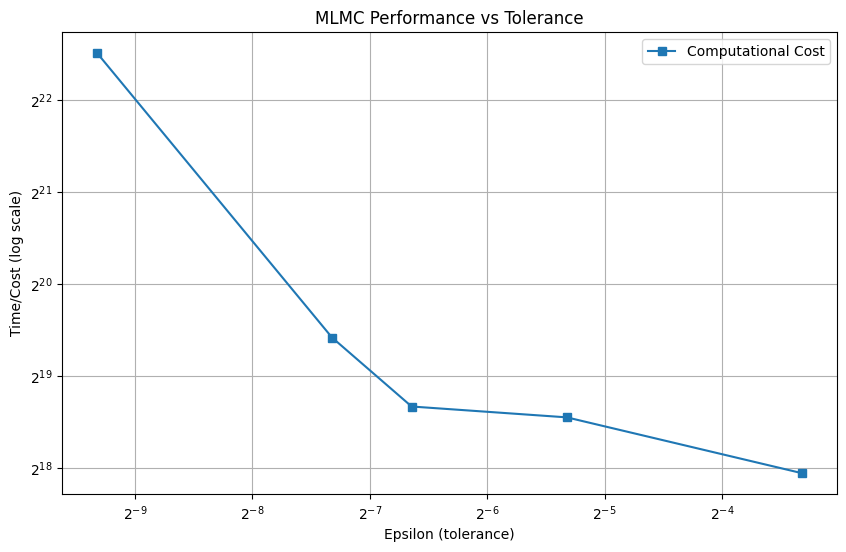

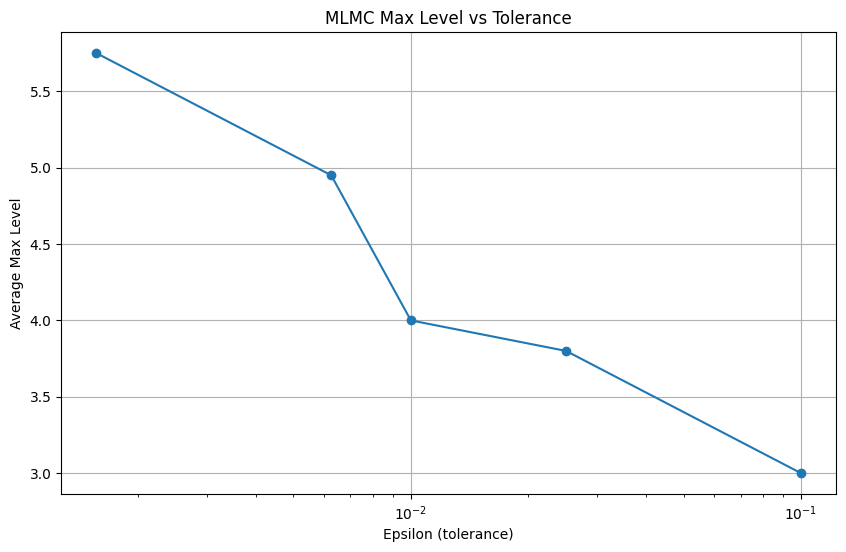

In [14]:

# Plot execution time vs epsilon
plt.figure(figsize=(10, 6))
epsilon_results = benchmark_results[benchmark_results['x'] == 0.5]
epsilon_results = epsilon_results[epsilon_results['dt0'] == 0.01]
epsilon_results = epsilon_results[epsilon_results['test_name'] == "Sine"]
epsilon_results = epsilon_results.sort_values('epsilon')
print(epsilon_results)
#plt.loglog(epsilon_results['epsilon'], epsilon_results['avg_execution_time'], 'o-', label='Execution Time')
plt.loglog(epsilon_results['epsilon'], epsilon_results['avg_computational_cost'], 's-', label='Computational Cost', base=2)
plt.xlabel('Epsilon (tolerance)')
plt.ylabel('Time/Cost (log scale)')
plt.title('MLMC Performance vs Tolerance')
plt.legend()
plt.grid(True)
plt.savefig("cost_per_epsilon_plot.png")
plt.show()

# Plot max level vs epsilon
plt.figure(figsize=(10, 6))
plt.semilogx(epsilon_results['epsilon'], epsilon_results['avg_max_level'], 'o-')
plt.xlabel('Epsilon (tolerance)')
plt.ylabel('Average Max Level')
plt.title('MLMC Max Level vs Tolerance')
plt.grid(True)
plt.savefig("avg_max_level.png")
plt.show()

[ 1.50762613  1.25160612  3.22041268 13.88448359  1.46336709  1.062711  ]


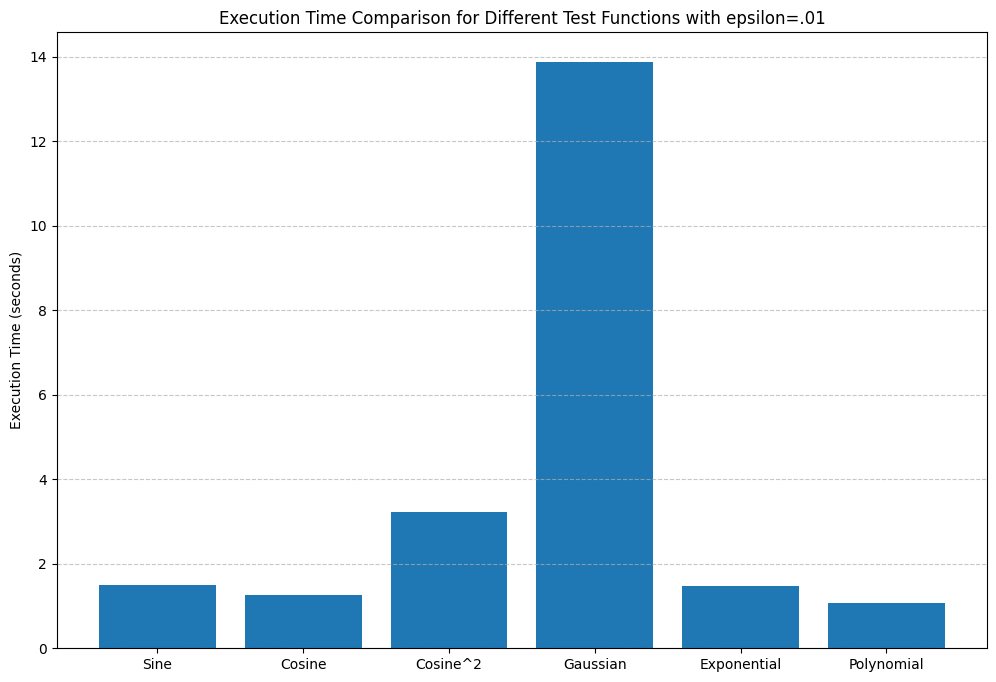

In [4]:

function_results = benchmark_results
function_results = benchmark_results[benchmark_results['x'] == 0.5]
function_results = function_results[function_results['dt0'] == dt0]
function_results = function_results[function_results['epsilon'] == eps]

times = function_results['avg_execution_time'].values
funcs = function_results['test_name'].values
print(times)

# Create boxplot of execution times
plt.figure(figsize=(12, 8))
boxplot = plt.bar(
    funcs,
    times
)

plt.title('Execution Time Comparison for Different Test Functions with epsilon=.01')
plt.ylabel('Execution Time (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

[ 402267.55  352405.05  820091.85 5463987.25  501241.1   352776.35]


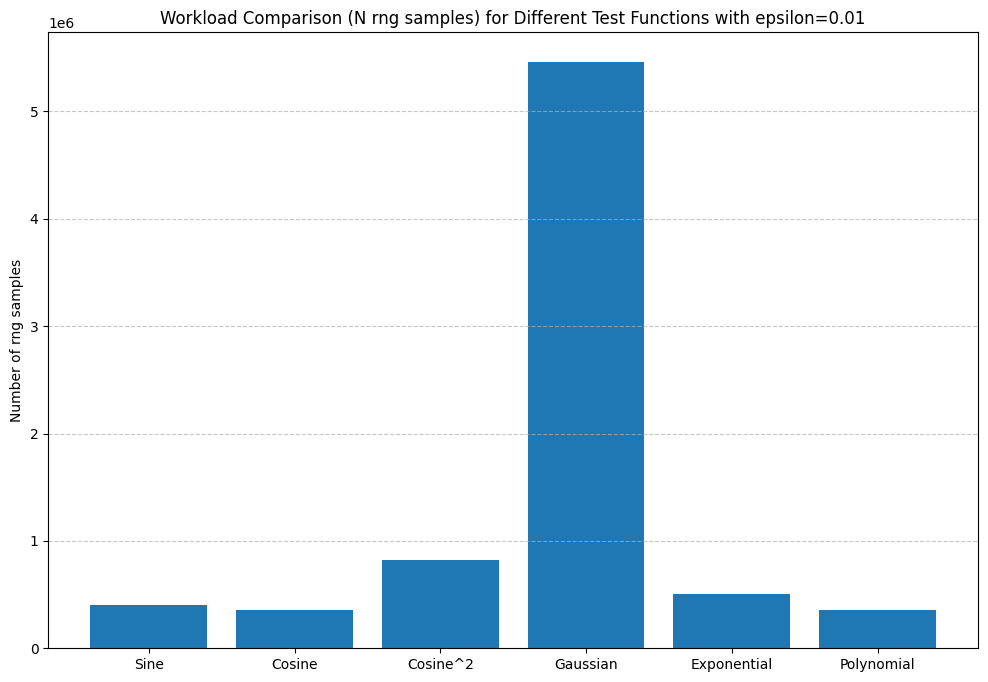

In [5]:
work = function_results['avg_computational_cost'].values 
funcs = function_results['test_name'].values
print(work)

# Create boxplot of execution times
plt.figure(figsize=(12, 8))
boxplot = plt.bar(
    funcs,
    work
)

plt.title('Workload Comparison (N rng samples) for Different Test Functions with epsilon=0.01')
plt.ylabel('Number of rng samples')
plt.grid(axis='y', linestyle='--', alpha=0.7)

[2.4693543  1.84839123 1.50762613 1.5766494 ]
[0.1    0.01   0.001  0.0001]


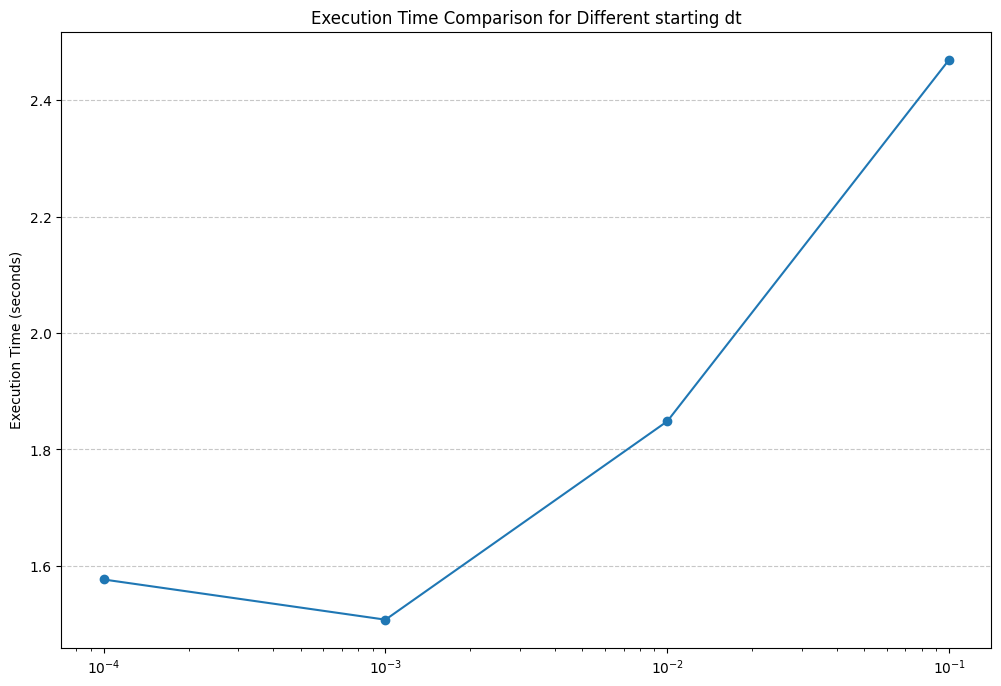

In [6]:

dt_result = benchmark_results
dt_result = benchmark_results[benchmark_results['x'] == 0.5]
dt_result = dt_result[dt_result['f'] == sin]
dt_result = dt_result[dt_result['epsilon'] == 0.01]

times = dt_result['avg_execution_time'].values
print(times)
dts = dt_result['dt0'].values
print(dts)

# Create boxplot of execution times
plt.figure(figsize=(12, 8))
boxplot = plt.semilogx(
    dts,
    times
)
plt.scatter(dts, times)
plt.title('Execution Time Comparison for Different starting dt')
plt.ylabel('Execution Time (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

[0.00633436 0.00598841 0.00733253 0.00946787 0.00807376 0.00390556]


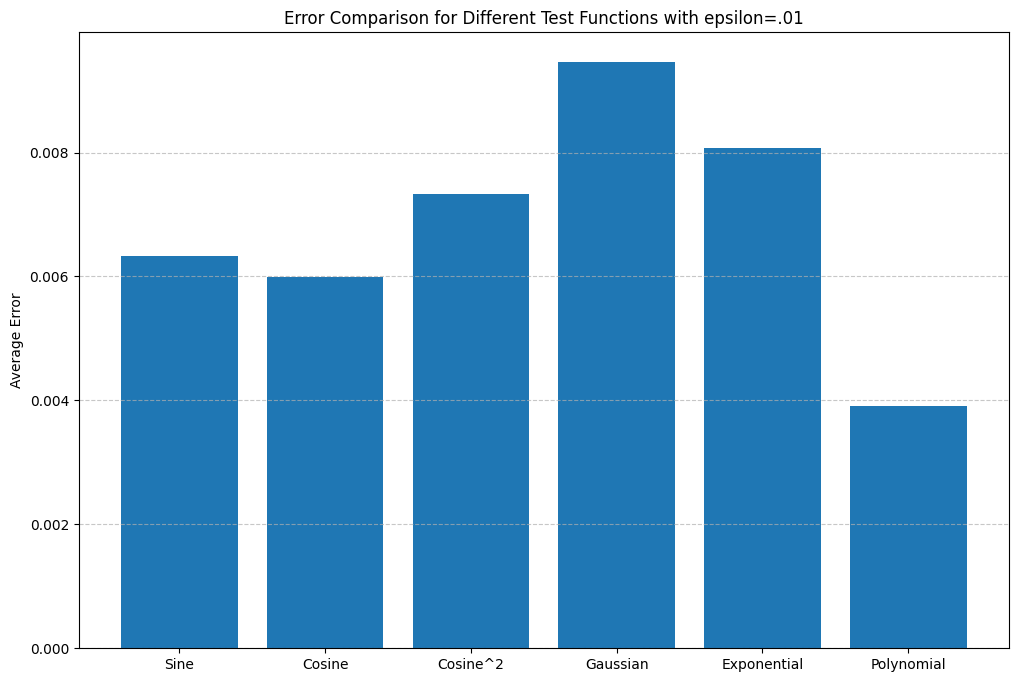

In [7]:

errors = function_results['avg_error'].values
funcs = function_results['test_name'].values
print(errors)

# Create boxplot of execution times
plt.figure(figsize=(12, 8))
boxplot = plt.bar(
    funcs,
    errors
)

plt.title('Error Comparison for Different Test Functions with epsilon=.01')
plt.ylabel('Average Error')
plt.grid(axis='y', linestyle='--', alpha=0.7)

[3.25 3.   3.8  3.65 3.   3.  ]


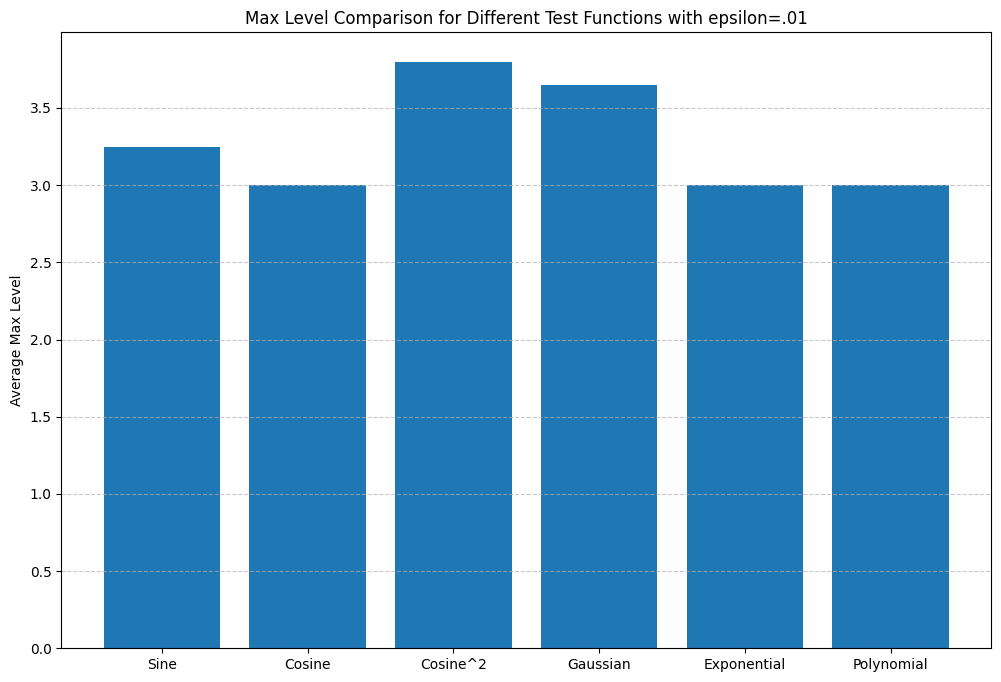

In [8]:

levels = function_results['avg_max_level'].values
funcs = function_results['test_name'].values
print(levels)

# Create boxplot of execution times
plt.figure(figsize=(12, 8))
boxplot = plt.bar(
    funcs,
    levels
)

plt.title('Max Level Comparison for Different Test Functions with epsilon=.01')
plt.ylabel('Average Max Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)

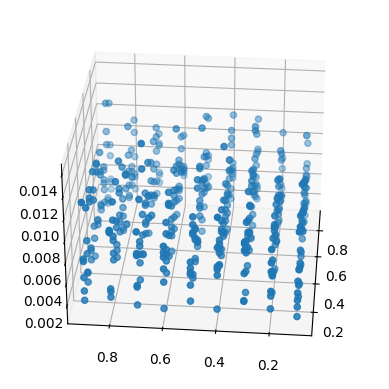

In [6]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
benchmark_data_wos = pd.read_csv("benchmark_data.csv")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(benchmark_data_wos['x'], benchmark_data_wos['y'], benchmark_data_wos['avg_error'])
ax.view_init(30, 185)

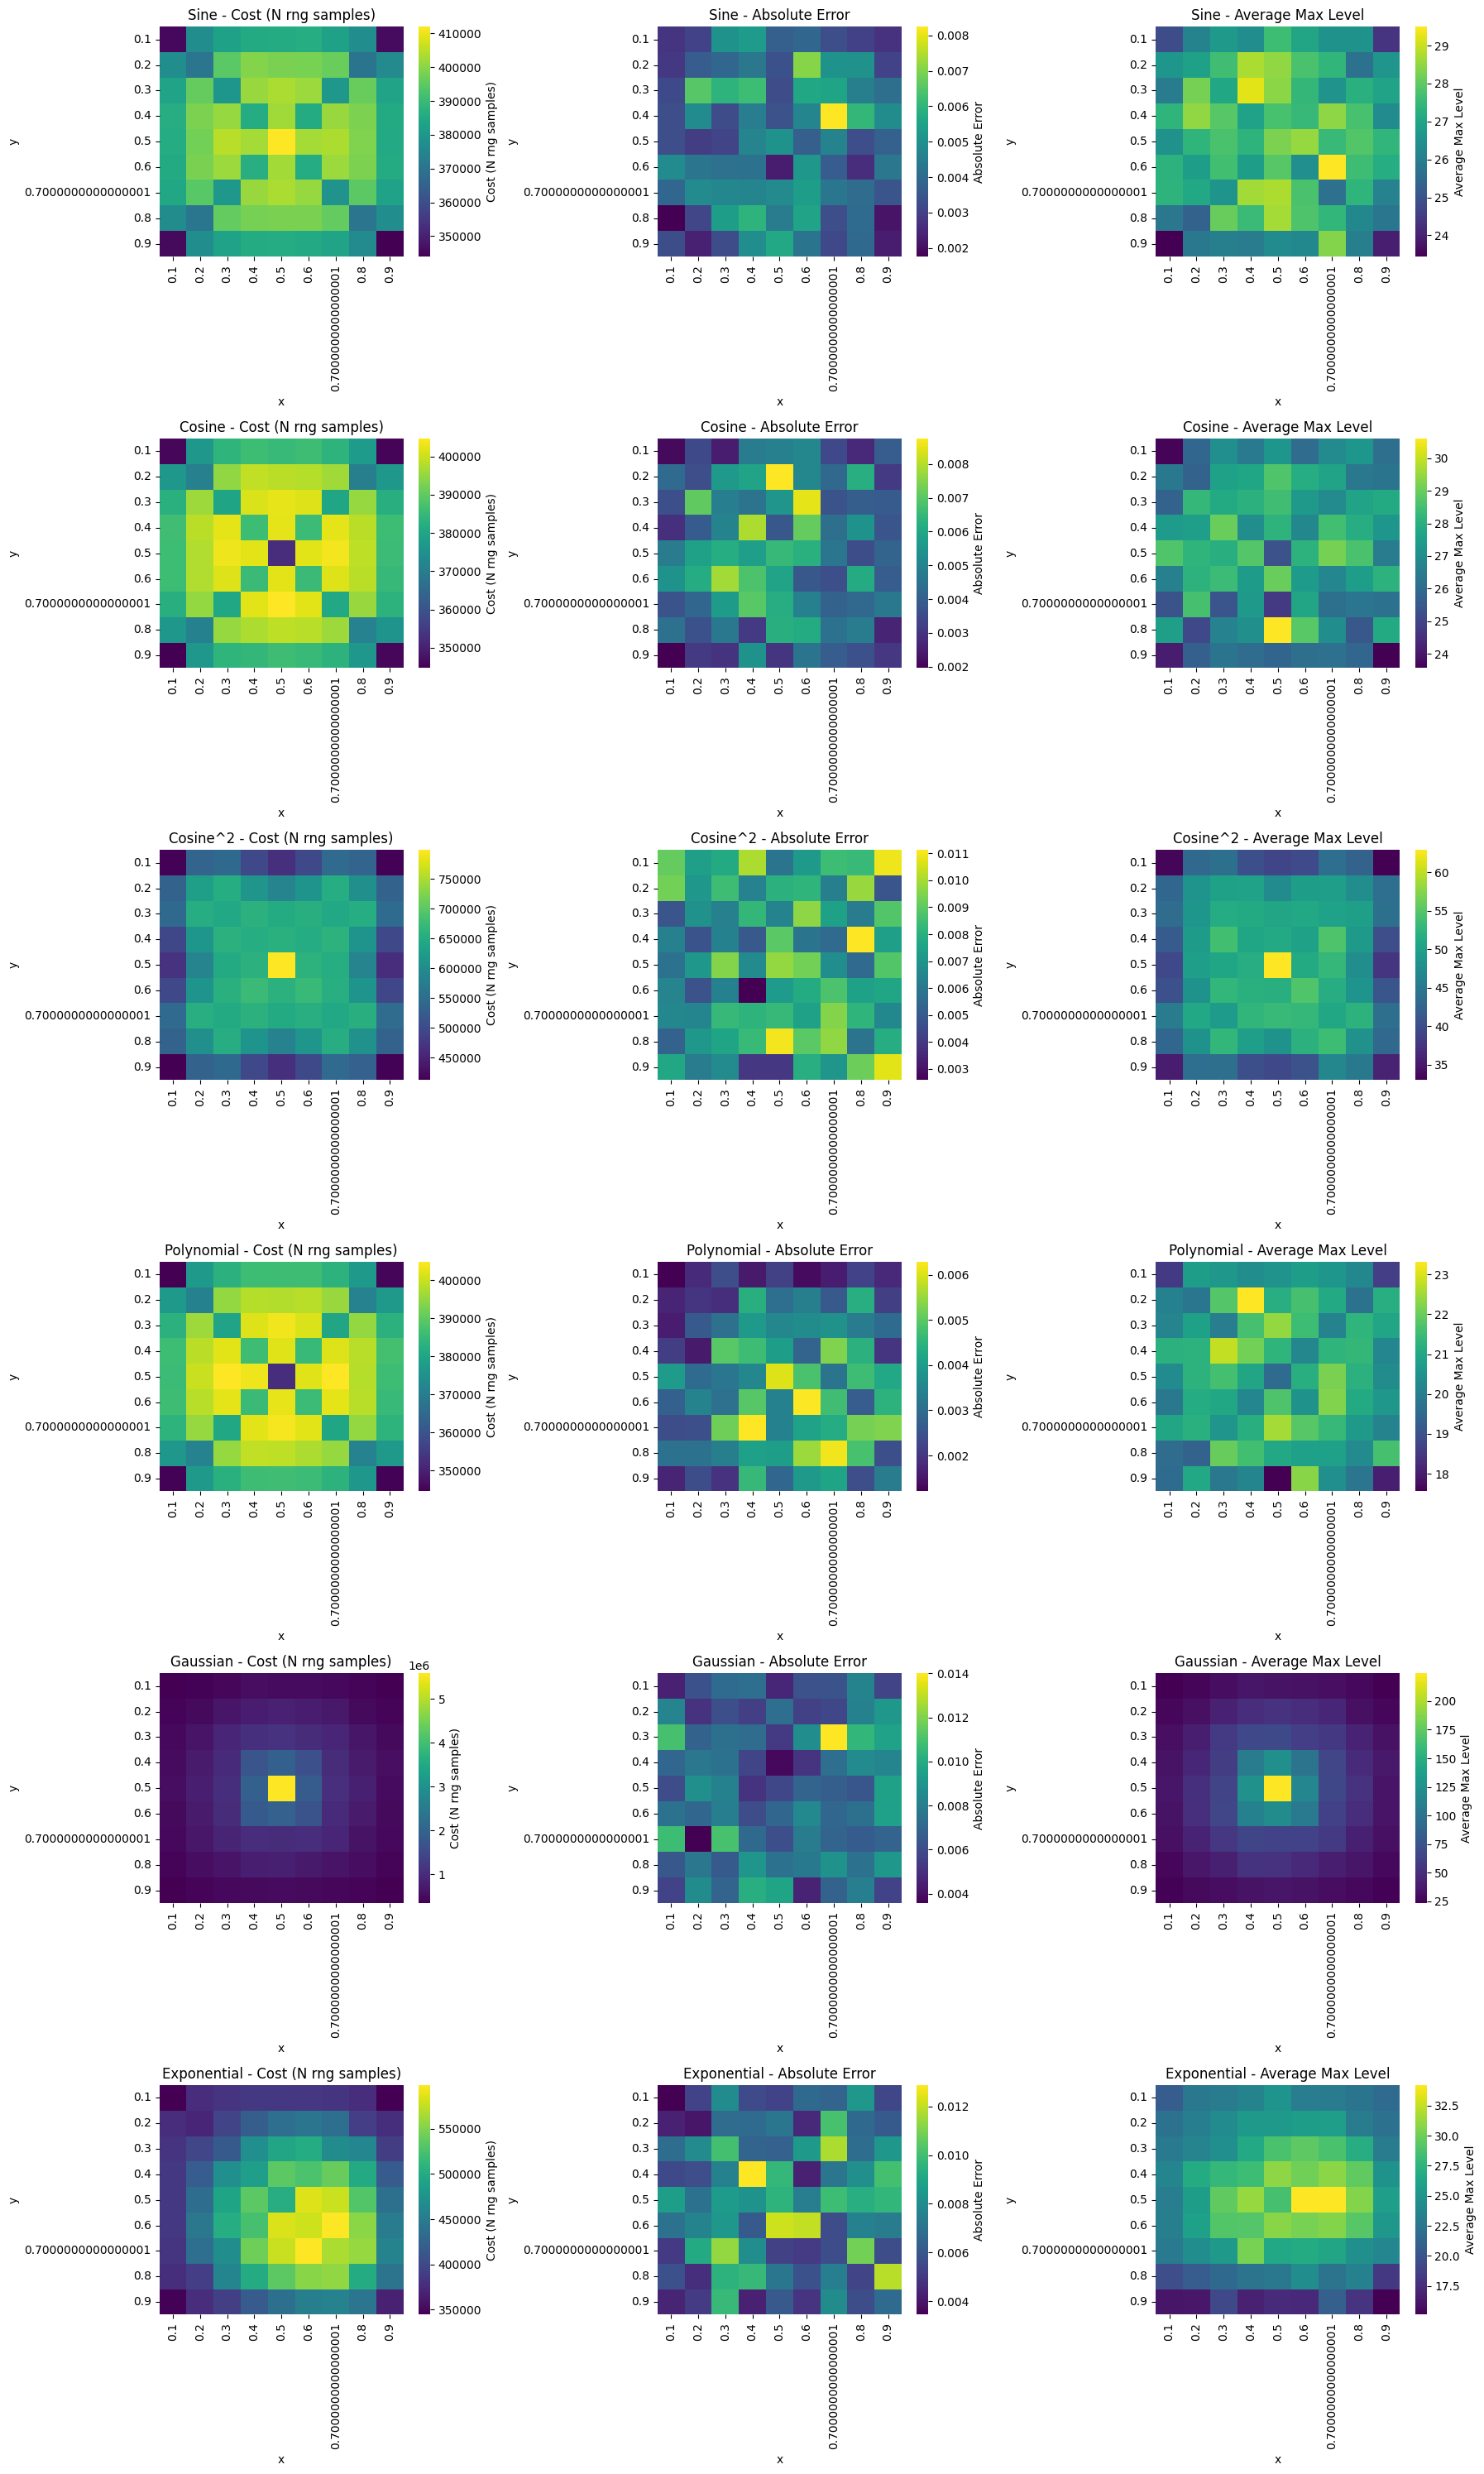

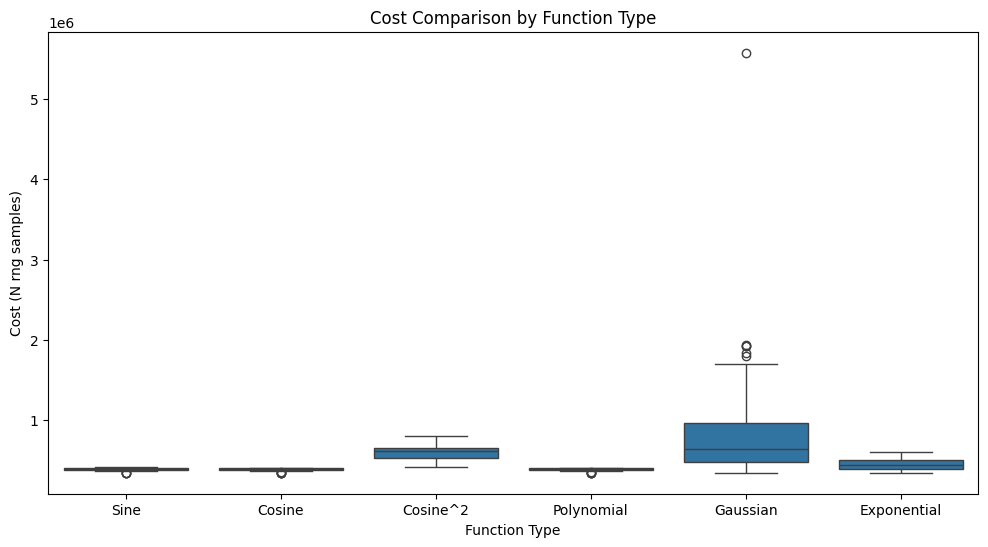

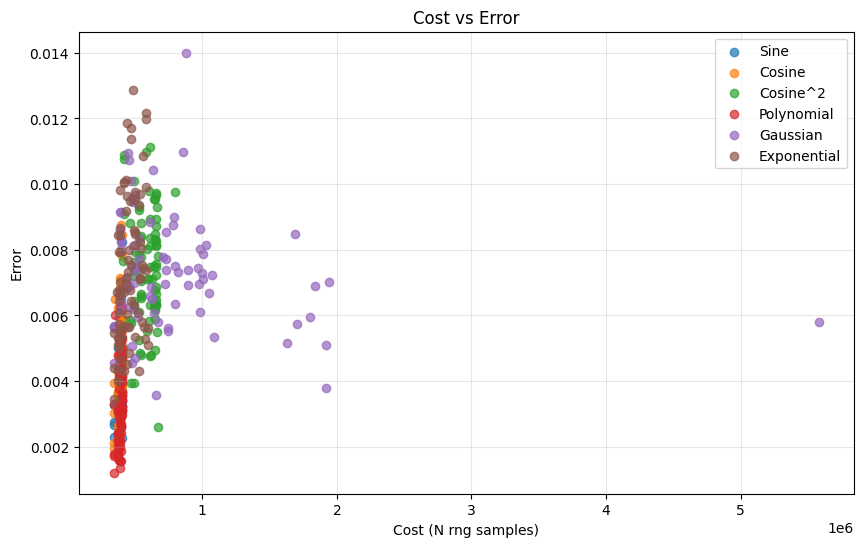

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the benchmark data
# Based on the fragments, it appears we have columns like:
# index, param1, param2, function, rhs_function, step_size, tolerance, 
# execution_time, operations, order, error, relative_error, function_type

# Let's create a simplified DataFrame with the key columns we need
data = []
# This would be replaced with your actual data loading code
# For demonstration, I'll create a sample based on the fragments

# Parse the benchmark data fragments
# In a real scenario, you would load the CSV file directly:
# df = pd.read_csv('benchmark_data.csv')

# For this example, I'll create a dataframe with the visible data points

df = pd.read_csv('benchmark_data.csv')
# Then select only the columns you need
df = df[['x', 'y', 'avg_execution_time', 'avg_computational_cost', 'avg_error', 'avg_max_level', 'test_name']]


# Create pivot tables for heatmaps
# Round param values to create proper grid


# Create separate dataframes for each function type
function_types = df['test_name'].unique()

# Set up the figure for multiple heatmaps
fig, axes = plt.subplots(len(function_types), 3, figsize=(18, 5*len(function_types)))
plt.subplots_adjust(hspace=0.3)

metrics = ['avg_computational_cost', 'avg_error', 'avg_execution_time']
titles = ['Cost (N rng samples)', 'Absolute Error', 'Average Max Level']

for i, func_type in enumerate(function_types):
    func_data = df[df['test_name'] == func_type]

    for j, (metric, title) in enumerate(zip(metrics, titles)):
        # Create pivot table
        pivot = func_data.pivot_table(
            index='x', 
            columns='y',
            values=metric,
            aggfunc='mean'
        )

        # Plot heatmap
        ax = axes[i, j]
        sns.heatmap(pivot, fmt=".3g", cmap="viridis", ax=ax, cbar_kws={'label': title})
        ax.set_title(f"{func_type} - {title}")
        ax.set_xlabel("x")
        ax.set_ylabel("y")

plt.tight_layout()
plt.savefig('benchmark_heatmaps_time.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional analysis: Create a comparison plot across function types
plt.figure(figsize=(12, 6))
sns.boxplot(x='test_name', y='avg_computational_cost', data=df)
plt.title('Cost Comparison by Function Type')
plt.ylabel('Cost (N rng samples)')
plt.xlabel('Function Type')
plt.savefig('cost_comparison.png', dpi=300)
plt.show()

# Create a scatter plot of execution time vs error
plt.figure(figsize=(10, 6))
for func_type in function_types:
    func_data = df[df['test_name'] == func_type]
    plt.scatter(func_data['avg_computational_cost'], func_data['avg_error'], label=func_type, alpha=0.7)
plt.title('Cost vs Error')
plt.xlabel('Cost (N rng samples)')
plt.ylabel('Error')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('cost_vs_error.png', dpi=300)
plt.show()

In [53]:
agg_data = pd.DataFrame(columns=['mean cost', 'median cost', 'max cost', 'mean max level', 'test function'])
for i, func in enumerate(function_types):
    func_data = df[df['test_name'] == func]
    mean_cost = int(func_data['avg_computational_cost'].mean().round())
    median_cost = int(func_data['avg_computational_cost'].median().round())
    max_cost = int(func_data['avg_computational_cost'].max().round())
    mean_max_level = func_data['avg_max_level'].mean().round(4)

    func_agg_data = pd.DataFrame([[ mean_cost, median_cost, max_cost, mean_max_level, func ]],
                                 columns=agg_data.columns)
    
    agg_data = pd.concat([func_agg_data, agg_data], ignore_index=True)

agg_data =  agg_data.pivot(index = 'test function',)

/tmp/ipykernel_2863/1167636201.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  agg_data = pd.concat([func_agg_data, agg_data], ignore_index=True)


ValueError: Length mismatch: Expected 6 rows, received array of length 5

In [50]:
agg_data.to_csv("wos_function_table.csv")